**Завдання:**

З бібліотеки датасетів Tensorflow за допомогою функції tfds.load завантажте датасет під назвою "cars196". Застосуйте до зображення із цього датасету аугментаційні перетворення:

- дзеркальне відображення
- зміна насиченості кольорів
- відображення в grayscale
- поворот на 90 градусів
- обрізка по краях
- зміна яскравості

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [5]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\админ\tensorflow_datasets\cats_vs_dogs\4.0.0.incompleteFG6BSG\cats_vs_dogs-train.tfrecord*.…

Dataset cats_vs_dogs downloaded and prepared to C:\Users\админ\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


In [6]:
get_label_name = metadata.features['label'].int2str

In [17]:
iterator = iter(test_ds)
for i in range(10):
    next(iterator)

image, label = next(iterator)

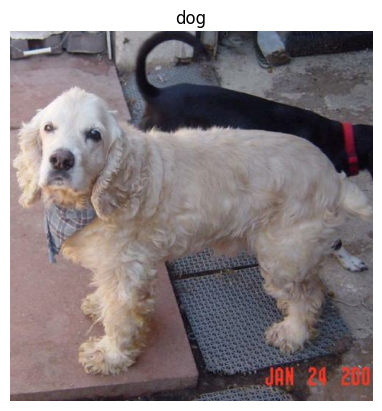

In [20]:
plt.imshow(image)
plt.title(get_label_name(label))
plt.axis("off")
plt.show()

In [24]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")
 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

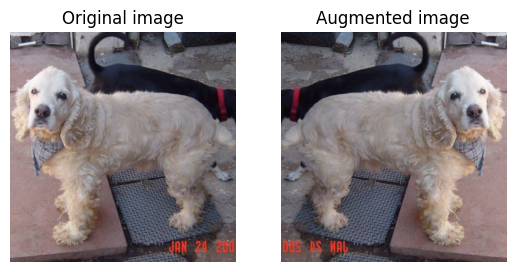

In [25]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

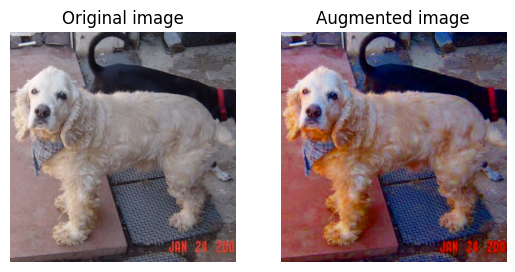

In [26]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

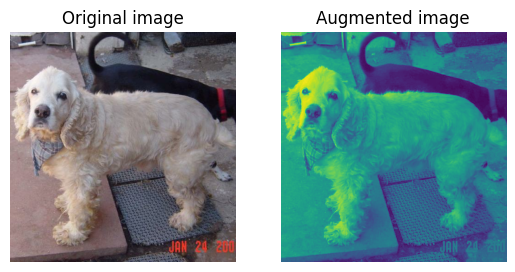

In [27]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,  tf.squeeze(grayscaled))

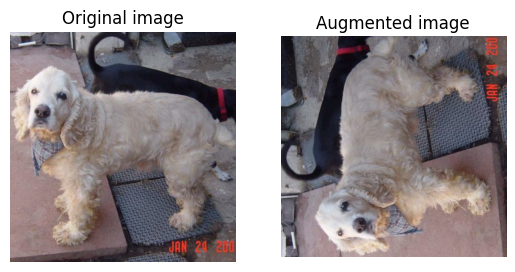

In [28]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

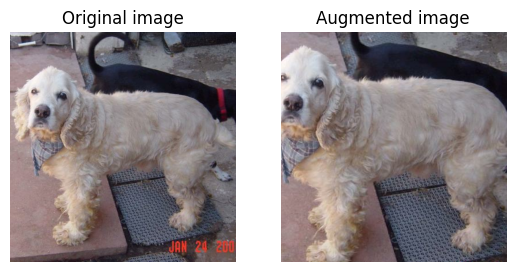

In [29]:
cropped = tf.image.central_crop(image, central_fraction=0.8)
visualize(image, cropped)

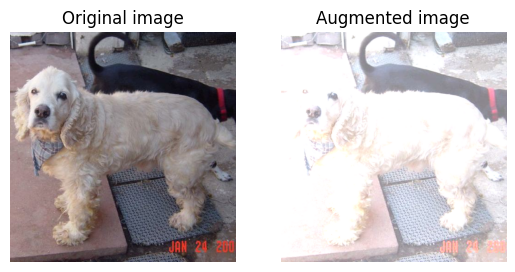

In [30]:
bright = tf.image.adjust_brightness(image, 0.5)
visualize(image, bright)

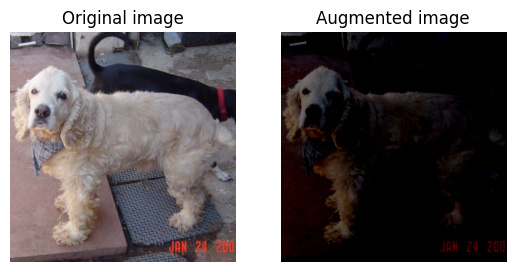

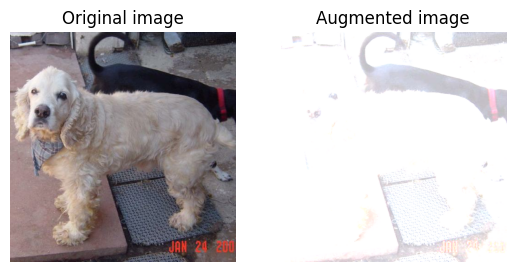

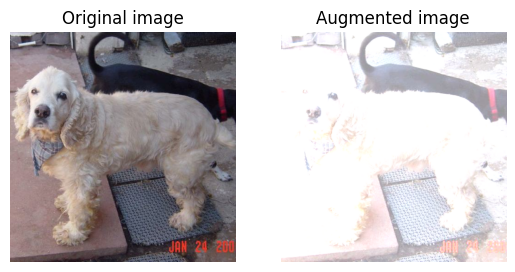

In [31]:
for i in range(3):
  seed = (i, 0)  
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)